In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%config InlineBackend.figure_format = 'retina'

## 2

In [4]:
df_life = pd.read_csv("life-expectancy-at-birth-total-years.csv")

df_life.head()

,Entity,Code,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,AFG,1960,32.292
1,Afghanistan,AFG,1961,32.742
2,Afghanistan,AFG,1962,33.185
3,Afghanistan,AFG,1963,33.624
4,Afghanistan,AFG,1964,34.060


In [10]:
# Rename Life Expectancy column for easier reading

df_life = df_life.rename(columns={"Life expectancy at birth, total (years)": "Life Expectancy"})

df_life

,Entity,Code,Year,Life Expectancy
0,Afghanistan,AFG,1960,32.292
1,Afghanistan,AFG,1961,32.742
2,Afghanistan,AFG,1962,33.185
3,Afghanistan,AFG,1963,33.624
4,Afghanistan,AFG,1964,34.060
...,...,...,...,...
13742,Zimbabwe,ZWE,2012,56.516
13743,Zimbabwe,ZWE,2013,58.053
13744,Zimbabwe,ZWE,2014,59.360
13745,Zimbabwe,ZWE,2015,60.398


In [26]:
df_life.loc[df_life['Entity'].isin(['Egypt','Belarus', 'Finland', 'Timor'])]

,Entity,Code,Year,Life Expectancy
912,Belarus,BLR,1960,67.708098
913,Belarus,BLR,1961,68.212659
914,Belarus,BLR,1962,68.635829
915,Belarus,BLR,1963,68.992073
916,Belarus,BLR,1964,69.289927
...,...,...,...,...
12488,Timor,TLS,2012,67.805000
12489,Timor,TLS,2013,68.033000
12490,Timor,TLS,2014,68.285000
12491,Timor,TLS,2015,68.569000


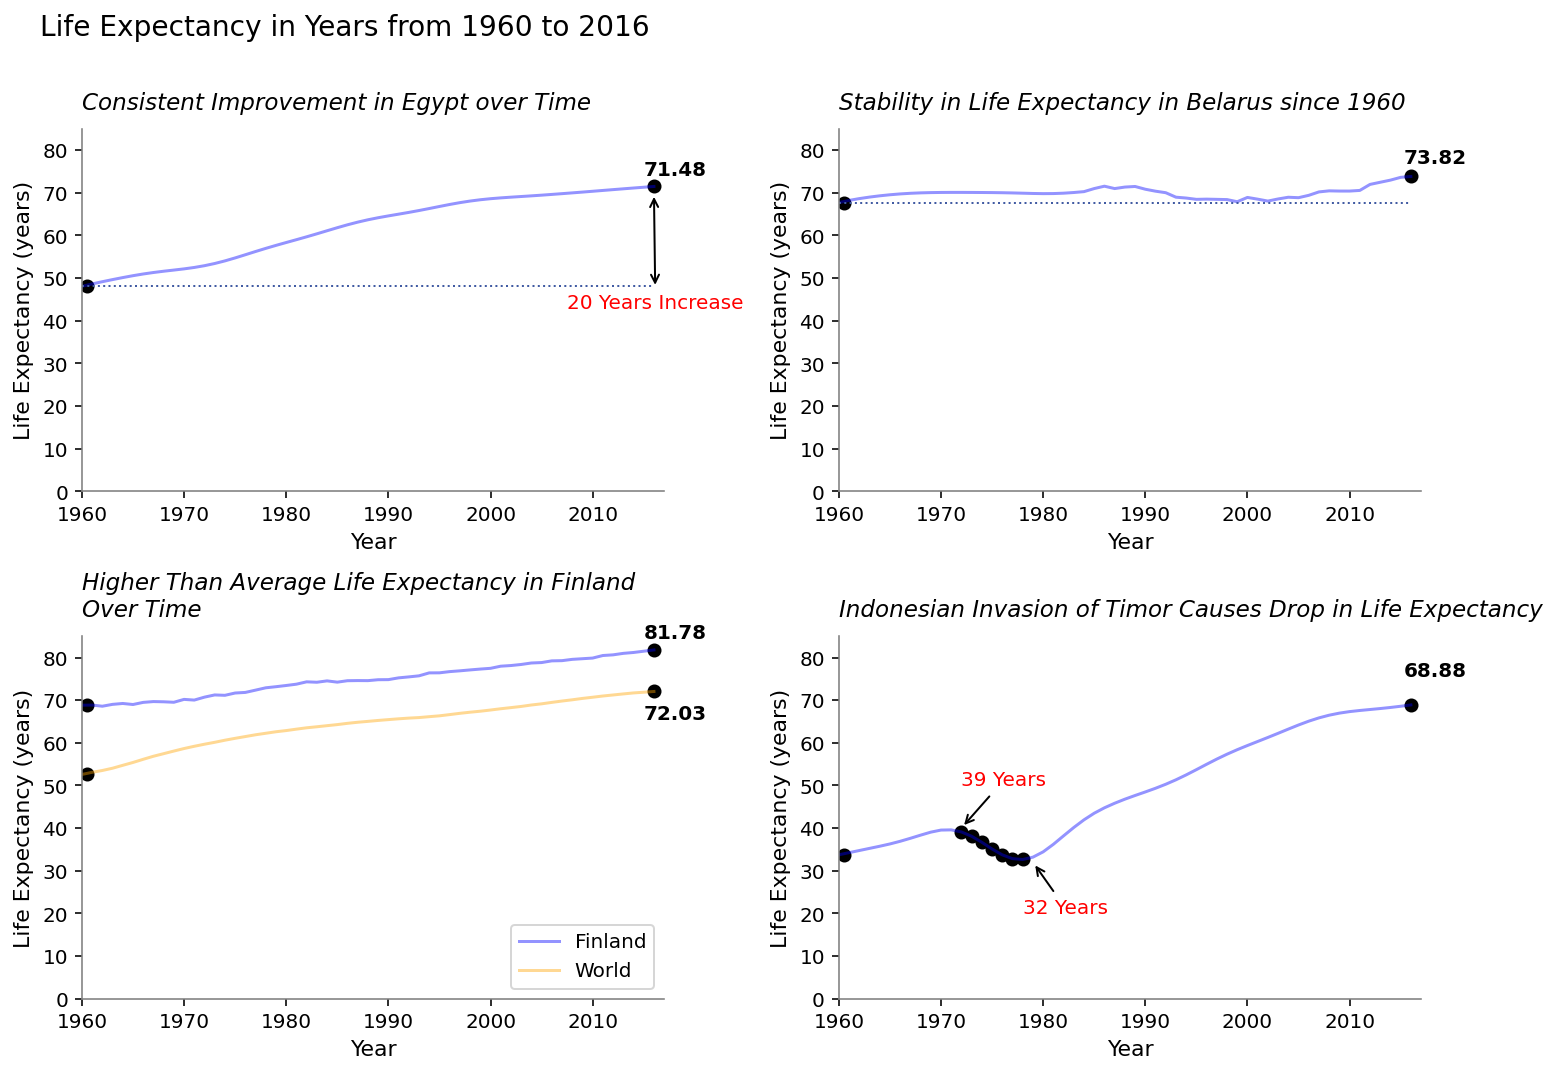

In [267]:
# Putting 4 graphs of 4 countries together

lg = '#808080'
def axis_plot(ax):
    ax.set_ylim(0, 85)
    ax.set_xlim(1960, 2017)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(lg)
    ax.spines["left"].set_color(lg)
    
    ax.set_ylabel("Life Expectancy (years)", fontsize=11)
    ax.set_xlabel("Year", fontsize=11)
    return ax

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,8),
                                            gridspec_kw={'hspace': 0.4, 'wspace':0.3})


# Egypt
df_life[df_life['Entity'] == 'Egypt'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                           ax=axis_plot(ax1), legend=False)
years_egypt = [1960.5, 2016]
values_egypt = [48.056, 71.484]
ax1.scatter(years_egypt, values_egypt, color="black")
ax1.set_title("Consistent Improvement in Egypt over Time", style='italic', fontsize=11.5,loc='left', pad=10)
ax1.text(0.45,0.84,'71.48',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax1.plot([1960,2016], [48.05,48.05], ':', c='#415BA3', lw=1)
ax1.annotate("20 Years Increase", xy=(2016, 70), xytext=(2007.5, 43), color='red', arrowprops=dict(arrowstyle="<->"))


# Belarus
df_life[df_life['Entity'] == 'Belarus'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                             ax=axis_plot(ax2), legend=False)
years_bel = [1960.5, 2016]
values_bel = [67.708, 73.826]
ax2.scatter(years_bel, values_bel, color="black")
ax2.set_title("Stability in Life Expectancy in Belarus since 1960", 
              style='italic', fontsize=11.5, loc='left', pad=10)
ax2.text(0.89,0.85,'73.82',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax2.plot([1960,2016], [67.7,67.7], ':', c='#415BA3', lw=1)



# Finland
df_life[df_life['Entity'] == 'Finland'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                             label='Finland',ax=axis_plot(ax3))
df_life[df_life['Entity'] == 'World'].plot(x='Year', y='Life Expectancy', linestyle='-', color='orange',alpha=0.425,
                                             label='World',ax=axis_plot(ax3))
years_fin = [1960.5, 2016]
values_fin = [68.819, 81.78]
years_world= [1960.5, 2016]
values_world = [52.57, 72.03]
ax3.scatter(years_fin, values_fin, color="black")
ax3.scatter(years_world, values_world, color="black")
ax3.set_title("Higher Than Average Life Expectancy in Finland\nOver Time", 
              style='italic', fontsize=11.5,loc='left', pad=10)
ax3.text(0.45,0.4375,'81.78',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax3.text(0.45,0.3675,'72.03',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax3.legend(loc='lower right')


# Timor
df_life[df_life['Entity'] == 'Timor'].plot(x='Year', y='Life Expectancy', color='blue', alpha=0.425,
                                           ax=axis_plot(ax4), legend=False)
years_timor = [1960.5, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 2016]
values_timor = [33.729, 39.085, 38.077, 36.659, 35.092, 33.714, 32.826, 32.628, 68.88]

ax4.scatter(years_timor, values_timor, color='black')
ax4.set_title("Indonesian Invasion of Timor Causes Drop in Life Expectancy", style='italic',
              fontsize=11.5, loc = 'left', pad=10)
ax4.text(0.89,0.405,'68.88',transform=fig.transFigure, fontsize=10, fontweight='bold')
ax4.annotate("39 Years", xy=(1972, 40), xytext=(1972, 50), color='red', 
             arrowprops=dict(arrowstyle="->"))
ax4.annotate("32 Years", xy=(1979, 32), xytext=(1978, 20), color='red', 
             arrowprops=dict(arrowstyle="->"))


plt.suptitle("Life Expectancy in Years from 1960 to 2016         ", horizontalalignment = 'right',fontsize=14)
plt.show()

## 3

In [189]:
df_brazil = pd.read_csv("brazil_excess_deaths.csv")

df_brazil.head(5)

,country,region,region_code,start_date,end_date,year,month,population,total_deaths,covid_deaths,...,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change,total_deaths_per_7_days,covid_deaths_per_7_days,expected_deaths_per_7_days,excess_deaths_per_7_days,non_covid_deaths_per_7_days,covid_deaths_per_100k_per_7_days,excess_deaths_per_100k_per_7_days
0,Brazil,Recife,26,2020-01-01,2020-01-31,2020,1,1645727,1334,0,...,0.000000,19.125286,0.308805,301.225806,0.000000,230.153226,71.072581,301.225806,0.000000,4.318613
1,Brazil,Recife,26,2020-02-01,2020-02-29,2020,2,1645727,1244,1,...,0.060763,17.591010,0.303300,300.275862,0.241379,230.396552,69.879310,300.034483,0.014667,4.246106
2,Brazil,Recife,26,2020-03-01,2020-03-31,2020,3,1645727,1386,7,...,0.425344,19.216431,0.295630,313.388964,1.582773,241.881561,71.507402,311.806191,0.096175,4.345034
3,Brazil,Recife,26,2020-04-01,2020-04-30,2020,4,1645727,1815,238,...,14.461694,50.524783,0.845450,423.500000,55.533333,229.483333,194.016667,367.966667,3.374395,11.789116
4,Brazil,Recife,26,2020-05-01,2020-05-31,2020,5,1645727,2979,897,...,54.504787,119.552028,1.945131,672.677419,202.548387,228.403226,444.274194,470.129032,12.307533,26.995619


TypeError: barh() got multiple values for argument 'width'